data: <br>
test.benign: 360 <br>
test.malignant: 300 <br>
train.benign: 1440 <br>
train.malignant: 1197 <br>
total.benign: 1800 <br>
total.malignant: 1497 <br>

train b1000 m1000
validation b250 m250
test b247 m247

In [1]:
import os, shutil

In [8]:
path = '../data/big/benign'
for file in os.listdir(path):
    new = 'benign.' + file
    os.rename(os.path.join(path, file), os.path.join(path, new))

In [9]:
path = '../data/big/malignant'
for file in os.listdir(path):
    new = 'malignant.' + file
    os.rename(os.path.join(path, file), os.path.join(path, new))

In [2]:
# The path to the directory where the original
# dataset is uncompressed
original_dataset_dir = '../data/big'

# The directory where to
# store the smaller dataset
base_dir = '../data/idea1'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# Create the directories for the 
# training partition
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
    
# validation partition
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)

# test partition
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

print("train_dir=",train_dir)
print("validation_dir=",validation_dir)
print("test_dir=",test_dir)

train_dir= ../data/idea1\train
validation_dir= ../data/idea1\validation
test_dir= ../data/idea1\test


In [3]:
# Directory with the training benign pictures
train_benign_dir = os.path.join(train_dir, 'benign')
if not os.path.exists(train_benign_dir):
    os.mkdir(train_benign_dir)

# Directory with the training dog pictures
train_malignant_dir = os.path.join(train_dir, 'malignant')
if not os.path.exists(train_malignant_dir):
    os.mkdir(train_malignant_dir)

# Directory with the validation benign pictures
validation_benign_dir = os.path.join(validation_dir, 'benign')
if not os.path.exists(validation_benign_dir):
    os.mkdir(validation_benign_dir)

# Directory with the validation dog pictures
validation_malignant_dir = os.path.join(validation_dir, 'malignant')
if not os.path.exists(validation_malignant_dir):
    os.mkdir(validation_malignant_dir)

# Directory with the test benign pictures
test_benign_dir = os.path.join(test_dir, 'benign')
if not os.path.exists(test_benign_dir):
    os.mkdir(test_benign_dir)

# Directory with the test dog pictures
test_malignant_dir = os.path.join(test_dir, 'malignant')
if not os.path.exists(test_malignant_dir):
    os.mkdir(test_malignant_dir)

In [19]:
# Copy first 1000 benign images to train_benigns_dir
fnames = ['benign.{}.jpg'.format(i) for i in range(1,1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_benign_dir, fname)
    shutil.copyfile(src, dst)

# Copy NEXT 250 benign images to validation_benigns_dir
fnames = ['benign.{}.jpg'.format(i) for i in range(1000, 1250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_benign_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy NEXT 250 benign images to test_benign_dir
fnames = ['benign.{}.jpg'.format(i) for i in range(1250, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_benign_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 malignant images to train_malignant_dir
fnames = ['malignant.{}.jpg'.format(i) for i in range(1,1000)]
for fname in fnames:
    try: 
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_malignant_dir, fname)
        shutil.copyfile(src, dst)
    except:
        pass
    
# Copy next 500 malignant images to validation_malignant_dir
fnames = ['malignant.{}.jpg'.format(i) for i in range(1000, 1250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_malignant_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 malignant images to test_malignant_dir
fnames = ['malignant.{}.jpg'.format(i) for i in range(1250, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_malignant_dir, fname)
    shutil.copyfile(src, dst)

In [15]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(224, 224, 3)))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

D:\Uni\DIS06\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be [0,1] standardized
train_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)

training_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

validation_generator = valid_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

Found 1995 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [18]:
%%time
history = model.fit(
            training_generator,
            steps_per_epoch=10,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=25)

Epoch 1/30
10/10 [==============================] - 10s 977ms/step - loss: 0.6936 - acc: 0.5250 - val_loss: 0.6858 - val_acc: 0.5900
Epoch 2/30
10/10 [==============================] - 9s 949ms/step - loss: 0.6878 - acc: 0.5550 - val_loss: 0.6812 - val_acc: 0.6900
Epoch 3/30
10/10 [==============================] - 9s 965ms/step - loss: 0.6737 - acc: 0.6950 - val_loss: 0.6790 - val_acc: 0.5000
Epoch 4/30
10/10 [==============================] - 9s 925ms/step - loss: 0.6652 - acc: 0.6100 - val_loss: 0.6751 - val_acc: 0.5000
Epoch 5/30
10/10 [==============================] - 9s 926ms/step - loss: 0.6544 - acc: 0.5600 - val_loss: 0.6644 - val_acc: 0.4920
Epoch 6/30
10/10 [==============================] - 9s 963ms/step - loss: 0.6517 - acc: 0.6359 - val_loss: 0.6559 - val_acc: 0.7380
Epoch 7/30
10/10 [==============================] - 10s 999ms/step - loss: 0.6493 - acc: 0.6800 - val_loss: 0.6487 - val_acc: 0.5740
Epoch 8/30
10/10 [==============================] - 9s 949ms/step - loss: 

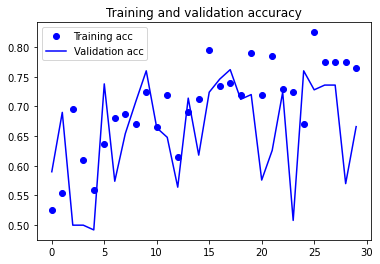

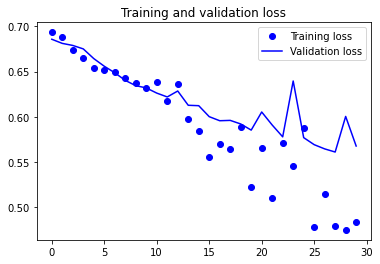

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.7)) # NOTE: dropout is used as well before the FC-layer starts
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

In [25]:
%%time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

print("train_dir=",train_dir)
print("validation_dir=",validation_dir)

history = model.fit(
      train_generator,
      steps_per_epoch=30, 
      epochs=30,
      validation_data=validation_generator,
      validation_steps=25)

Found 1995 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
train_dir= ../data/idea1\train
validation_dir= ../data/idea1\validation
Epoch 1/30
30/30 [==============================] - 23s 745ms/step - loss: 0.6915 - acc: 0.5193 - val_loss: 0.6883 - val_acc: 0.5020
Epoch 2/30
30/30 [==============================] - 21s 694ms/step - loss: 0.6894 - acc: 0.5333 - val_loss: 0.6824 - val_acc: 0.5560
Epoch 3/30
30/30 [==============================] - 22s 742ms/step - loss: 0.6740 - acc: 0.6333 - val_loss: 0.6725 - val_acc: 0.6600
Epoch 4/30
30/30 [==============================] - 21s 701ms/step - loss: 0.6641 - acc: 0.6317 - val_loss: 0.6676 - val_acc: 0.4780
Epoch 5/30
30/30 [==============================] - 21s 711ms/step - loss: 0.6547 - acc: 0.6336 - val_loss: 0.6484 - val_acc: 0.7300
Epoch 6/30
30/30 [==============================] - 21s 703ms/step - loss: 0.6268 - acc: 0.7210 - val_loss: 0.6346 - val_acc: 0.6060
Epoch 7/30
30/30 [=============================

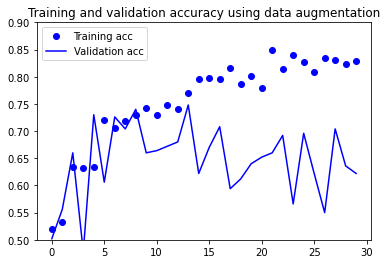

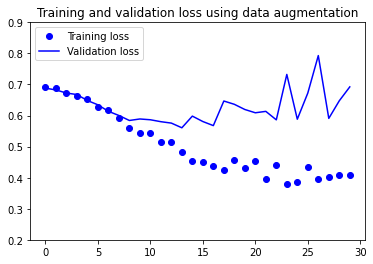

In [26]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.ylim((0.5,0.9))
plt.title('Training and validation accuracy using data augmentation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.ylim((0.2,0.9))
plt.title('Training and validation loss using data augmentation')
plt.legend()

plt.show()